In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
data = pd.read_csv('covid19.csv')
data.head(10)

,ObservationDate,Province_State,Country_Region,LastUpdate,Confirmed,Deaths,Recovered
0,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
5,1/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
6,1/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
7,1/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
8,1/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0
9,1/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0


In [45]:
data.head()

,ObservationDate,Province_State,Country_Region,LastUpdate,Confirmed,Deaths,Recovered
0,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [46]:
cases = data.loc[:, ['Recovered', 'Confirmed']]

In [47]:
#Data kasus terkonfirmasi

cases.head(10)

,Recovered,Confirmed
0,0,1
1,0,14
2,0,6
3,0,1
4,0,0
5,0,26
6,0,2
7,0,1
8,0,4
9,0,1


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [49]:
cases.shape

(116805, 2)

In [50]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Recovered  116805 non-null  int64
 1   Confirmed  116805 non-null  int64
dtypes: int64(2)
memory usage: 1.8 MB


In [51]:
cases.describe()

,Recovered,Confirmed
count,1.168050e+05,1.168050e+05
mean,1.117002e+04,1.908217e+04
std,6.258701e+04,5.825465e+04
min,0.000000e+00,0.000000e+00
25%,4.000000e+00,2.450000e+02
50%,4.260000e+02,2.148000e+03
75%,3.829000e+03,1.037400e+04
max,2.670256e+06,1.242770e+06


In [52]:
cases.isnull()

,Recovered,Confirmed
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
116800,False,False
116801,False,False
116802,False,False
116803,False,False


In [53]:
cases.isnull().sum()

Recovered    0
Confirmed    0
dtype: int64

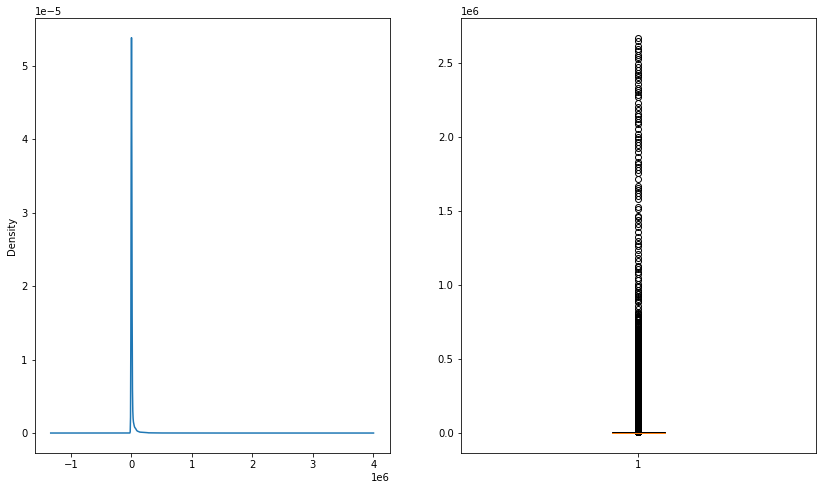

In [56]:
fig = plt.figure(figsize=(14,8))
fig.add_subplot(1, 2, 1)
cases['Recovered'].plot(kind='kde')

fig.add_subplot(1, 2, 2)
plt.boxplot(data['Recovered'])

plt.show()


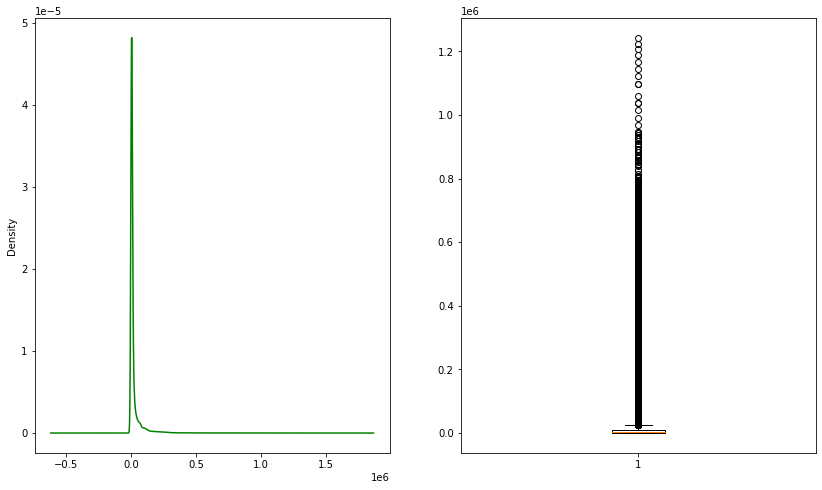

In [57]:
fig = plt.figure(figsize=(14,8))
fig.add_subplot(1, 2, 1)
cases['Confirmed'].plot(kind='kde', c='g')

fig.add_subplot(1, 2, 2)
plt.boxplot(data['Confirmed'])

plt.show()

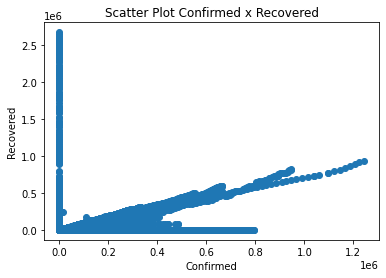

In [58]:
plt.scatter(cases['Confirmed'], cases['Recovered'])
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.title('Scatter Plot Confirmed x Recovered')
plt.show()

In [59]:
cases.corr()

,Recovered,Confirmed
Recovered,1.000000,0.430992
Confirmed,0.430992,1.000000


In [60]:
#modeling, membuat variable x dan y

x = cases['Confirmed'].values.reshape(-1, 1)
y = cases['Recovered'].values.reshape(-1, 1)

In [61]:
#Split data menjadi 80:20, 80% datatraining dan 20% datatesting

x_train, x_test, y_train, y_tesst = train_test_split(x, y, test_size=0.2)

In [62]:
lin_ = LinearRegression()

In [63]:
lin_.fit(x_train, y_train)

LinearRegression()

In [64]:
print(lin_.coef_)
print(lin_.intercept_)

[[0.45791197]]
[2455.50070459]


In [66]:
lin_.score(x_test, y_tesst)

0.23533858951020425

akurasinya hanya 2%

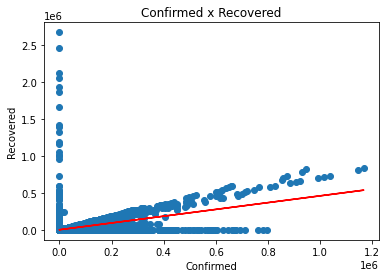

In [67]:
y_pred = lin_.predict(x_test)
plt.scatter(x_test, y_tesst)
plt.plot(x_test, y_pred, c='r')
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.title('Confirmed x Recovered')
plt.show()

In [68]:
lin_.predict([[1000]])

array([[2913.41267859]])